# Tree Models: Predicting Employee Productivity 

## Introduction

For this project, we'll be introducing the dataset *Productivity Prediction of Garment Employees*. The original dataset is in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Productivity+Prediction+of+Garment+Employees). Below is a description of the dataset, according to its official summary:

>The garment industry is one of the key examples of the industrial globalization of the modern era.It is a highly labour-intensive industry with lots of manual processes. 
>
>Satisfying the huge global demand for garment products is mostly dependent on the production and delivery performance of the employees in the garment manufacturing companies.
>
>So, it is highly desirable among the decision-makers in the garments industry to track, analyze, and predict the productivity performance of the working teams in their factories.

![germent](https://s3.amazonaws.com/dq-content/755/garment-factory-unsplash.jpg)

What's interesting about the dataset is that we can use it with both regression and classification algorithms, as is clearly stated in the final sentence of the official summary:

>This dataset can be used for regression purposes by predicting the productivity range (0-1) or for classification purposes by transforming the productivity range (0-1) into different classes.

In this project, we will focus on working with a classification tree. 

Let's start by loading *pandas*. To make sure that the data was successfully loaded, we will use the `.head()` function to visualize the headers and the first five observations.

Don't worry about understanding what the different columns are telling us yet, because that's exactly what we will be doing in the following section.

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("garments_worker_productivity.csv")
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Dataset Exploration (EDA)

It is important to first understand what the dataset is telling us, along with its structure and general characteristics.

Let's start by getting the dataset's shape, where the first value indicates the number of observations and the second one the number of columns.

In [9]:
df.shape

(1197, 15)

Now let's explore the column numbers, how many non-null observations each one has, and their respective data types (dtypes).

In *pandas*, the "object" dtype means the observations of that specific column are treated as strings/text.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

We will now get general statistics about the numerical columns.

Remember that *std* stands for Standard Deviation, and the *percentages* represent percentiles. *min* and *max* indicate the maximum values on every column, so these are particularly useful to detect outliers.

In [11]:
df.describe()

,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


(array([691., 167.,  70.,  27.,  22.,  10.,   5.,   5.,   0.,   3.]),
 array([3.07115875e-05, 1.07272504e+00, 2.14541937e+00, 3.21811369e+00,
        4.29080802e+00, 5.36350235e+00, 6.43619668e+00, 7.50889100e+00,
        8.58158533e+00, 9.65427966e+00, 1.07269740e+01]),
 <BarContainer object of 10 artists>)

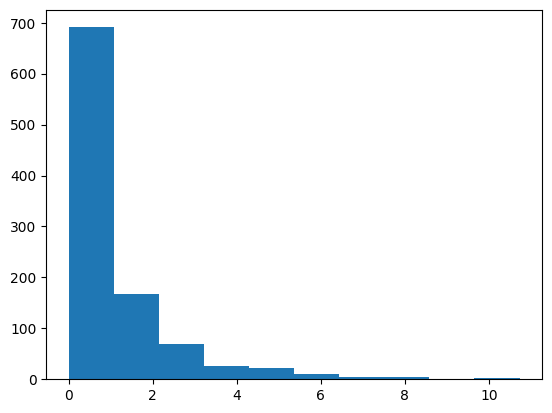

In [6]:
chi_squared_values = []
from numpy.random import random
import matplotlib.pyplot as plt
for i in range(1000):
    sequence = random((32561,))
    sequence[sequence < .5] = 0
    sequence[sequence >= .5] = 1
    male_count = len(sequence[sequence == 0])
    female_count = len(sequence[sequence == 1])
    male_diff = (male_count - 16280.5) ** 2 / 16280.5
    female_diff = (female_count - 16280.5) ** 2 / 16280.5    
    chi_squared = male_diff + female_diff    
    chi_squared_values.append(chi_squared)
plt.hist(chi_squared_values)